# Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

# Load Dataset

In [2]:
# Load the MNIST dataset directly from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

In [4]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separate features and labels
X = mnist_df
y = mnist.target

In [6]:
# Inspect the shape of the dataset
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Data shape: (70000, 784)
Labels shape: (70000,)


In [7]:
# Display the first few rows of the DataFrame
mnist_df.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standardizing the MNIST Dataset

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA for Dimensionality Reduction

In [9]:
# PCA to reduce dimensionality
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Convert X_pca to a Pandas DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]  # Create column names as 'PC1', 'PC2', ..., 'PC50'
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.891720,-4.929711,-0.093037,-8.064181,-0.751005,1.051977,0.283380,1.423696,-1.168443,2.406896,...,2.090232,1.822970,1.338141,0.479808,-3.342842,-1.501137,1.454627,-0.557809,-4.067293,0.058757
1,8.813530,-7.517560,-3.714185,-1.766171,0.891470,-5.107951,-0.134803,3.197204,-0.238236,-1.003397,...,1.391816,-0.320441,-0.811772,0.530419,-0.421011,0.645721,-0.426423,0.188731,0.419712,-1.191242
2,2.204835,9.824461,-5.752488,1.479672,4.397910,2.507384,18.927903,3.888998,2.443367,-0.145229,...,5.062477,-8.634300,-3.539446,-2.808019,0.297771,0.772478,-2.378536,-0.463034,4.216979,-1.384585
3,-6.534627,-4.029669,3.524017,-0.218098,5.606258,3.493729,1.445040,-4.683906,-0.613958,-2.533667,...,-0.444422,0.678357,0.607816,0.102736,-0.947609,1.242560,0.027288,0.166855,-0.402523,0.138831
4,-5.251618,3.278847,-6.182219,1.462659,-1.667988,-0.580805,-0.565823,-3.129524,0.005916,-0.972606,...,1.516949,0.280939,-0.124343,0.733877,-2.485444,2.036663,0.769068,-0.872455,-1.115059,-0.587784


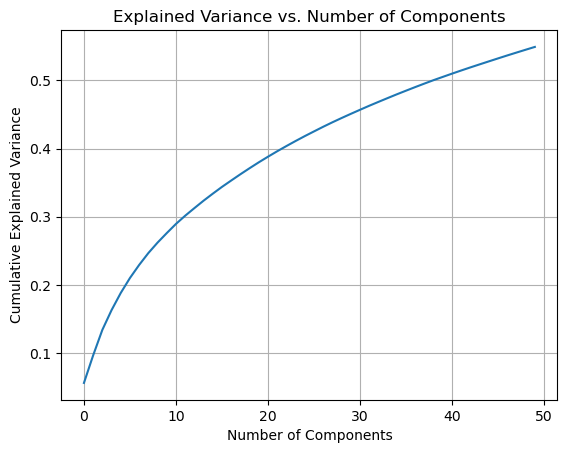

In [11]:
# Explained variance to check how much variance is retained
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Applying K-Means for Clustering

In [12]:
# Apply K-Means on the PCA-reduced data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=10, random_state=42)

In [13]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [14]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [15]:
# Convert y (actual labels) from string to integer
y_numeric = y.astype(int)

In [16]:
y_numeric

array([5, 0, 4, ..., 4, 5, 6])

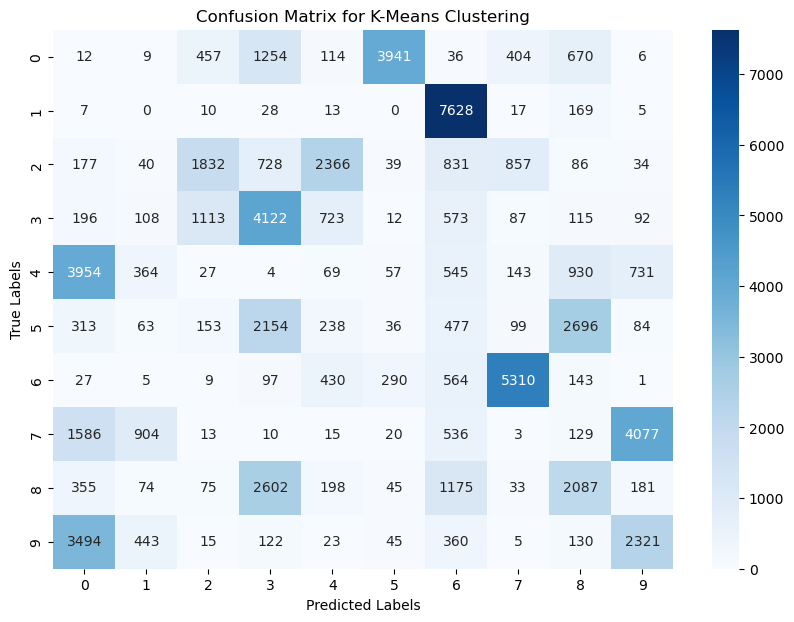

In [17]:
#: Compute and visualize the confusion matrix
confusion_mat = confusion_matrix(y_numeric, cluster_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# Cluster visualization using PCA

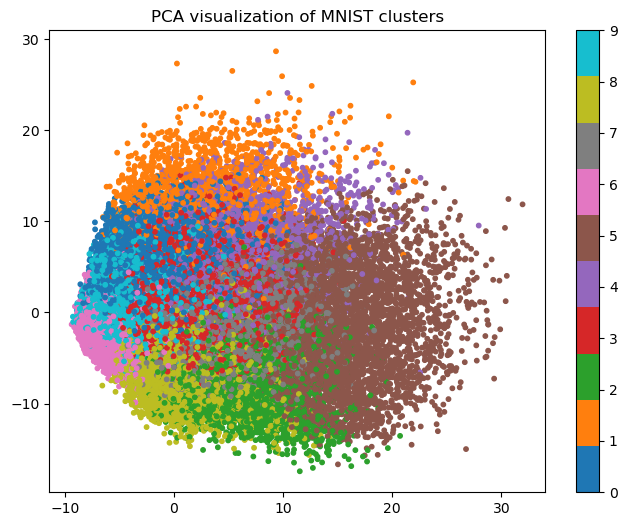

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title('PCA visualization of MNIST clusters')
plt.colorbar()
plt.show()

### PCA visualization is more straightforward and faster but can miss complex patterns (non-linear structures) in the data, while t-SNE focuses on preserving local structure and is more effective in uncovering subtle patterns and clusters.

# Visualizing Clusters using t-SNE

In [21]:
# Apply t-SNE to reduce to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
# X_tsne = tsne.fit_transform(X_pca)

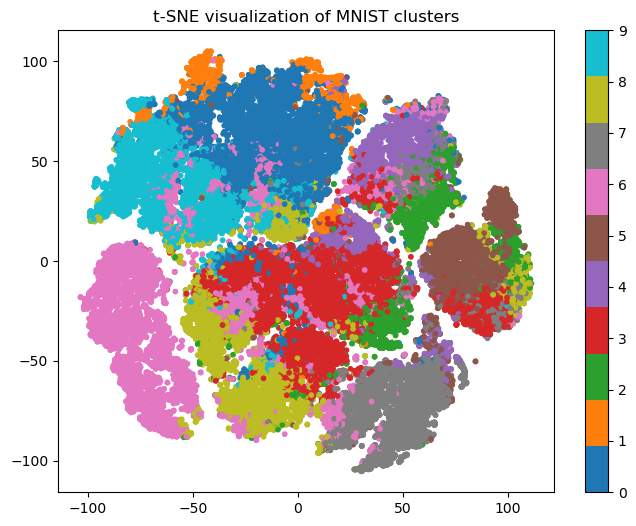

In [22]:
# Plot the clusters using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title('t-SNE visualization of MNIST clusters')
plt.colorbar()
plt.show()